In [74]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

%matplotlib inline

DATA_FILE = 'data/fire_theft.xls'

## Step 1: read in data from the .xls file


In [75]:
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

n_samples

42

## Step 2: create placeholders for input X (number of fire) and label Y (number of theft)


In [76]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

## Step 3: create weights (w, u) and bias (b), initialized to 0


In [77]:
w = tf.Variable(0.0, name='weights2')
u = tf.Variable(0.0, name='weights1')
b = tf.Variable(0.0, name='bias')

## Step 4: build model to predict Y


In [78]:
Y_predicted = X * X * w + X * u + b

## Step 5: use the square error as the loss function


In [79]:
loss = tf.square(Y - Y_predicted, name='loss')

## Step 6: using gradient descent with learning rate of 0.001 to minimize loss

<span style="color:red">\** Note this step is different from previous ones </span>


In [80]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

gradients = tf.gradients(loss, [w, u, b])
clipped_gradients, norm = tf.clip_by_global_norm(gradients, .1)
train_step = optimizer.apply_gradients(zip(clipped_gradients, [u,w,b]))

## Step 7, 8, 9 -> inside tf.session()

#### Step 7: initialize the necessary variables, in this case, w and b
#### Step 8: train the model
#### Step 9: output the values of w and b


In [81]:
with tf.Session() as sess:
    
    # Step 7: initialize the necessary variables, in this case, w and b
    
    sess.run(tf.global_variables_initializer()) 

    # Step 8: train the model
    
    for i in range(100): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([train_step, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    
    # Step 9: output the values of w and b
    
    w, u, b = sess.run([w, u, b]) 

Epoch 0: 1641.2966389883131
Epoch 1: 1621.5279516265505
Epoch 2: 1601.9609875451952
Epoch 3: 1582.5955854029883
Epoch 4: 1563.4318267504375
Epoch 5: 1544.4696269943602
Epoch 6: 1525.70903694062
Epoch 7: 1507.150088977246
Epoch 8: 1488.7928312122822
Epoch 9: 1470.6371186982308
Epoch 10: 1452.682947410315
Epoch 11: 1435.001869816599
Epoch 12: 1417.8594424937453
Epoch 13: 1400.909567655552
Epoch 14: 1384.1522915193013
Epoch 15: 1367.5877739361354
Epoch 16: 1351.215901806241
Epoch 17: 1335.0367374193102
Epoch 18: 1319.0502943197887
Epoch 19: 1303.256528422946
Epoch 20: 1287.6553996404011
Epoch 21: 1272.2470083236694
Epoch 22: 1257.0313544046312
Epoch 23: 1242.0083272570655
Epoch 24: 1227.1780034019835
Epoch 25: 1212.5404029119582
Epoch 26: 1198.0954986753918
Epoch 27: 1183.8433075859434
Epoch 28: 1169.7838257380895
Epoch 29: 1155.9170199802943
Epoch 30: 1142.2428726014637
Epoch 31: 1128.7615213848296
Epoch 32: 1115.4727675120037
Epoch 33: 1102.376701082502
Epoch 34: 1089.4733457111176
Epoc

In [82]:
print(b)
print(u)
print(w)


0.0135498
0.352812
0.0550596


# Plot the results


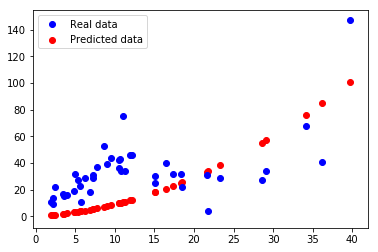

In [83]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.scatter(X, X * X * w + X * u + b, color = 'red', label='Predicted data')
plt.legend()
plt.show()

## Compare with the SGD, BGD, and Normalized version

SGD with **100 epoch** and **learning rate = .00001**


BGD with **100 epoch** and **learning rate = .00001**

Basis Function Expansion with SGD & *huber loss* - **100 epoch** and **learning rate = .00001**

Basis Function Expansion with SGD & *Gradient Clipping* - **100 epoch, clip_norm = 0.1** and **learning rate = .001**


|                   | **bias**(b)   | **Weight**(w) | **Cost**         |
| ----------------  |:-------------:| -------------:| ----------------:|
| **SGD**           | 0.611998      | 2.13033       | 463.52           |
| **BGD**           | 0.612963      | 2.13865       | 457.91           |
|**Normal(OLS)Eqn** | 16.99516296   | 1.31345558    | 360.82014974     |
|**BFE(Huber Loss)**| 0.0291879     | 0.172, 0.053  | 23.331           |
|**BFE(Grad Clip)** | 0.0135498     | 0.352, 0.055  | 671.303709       |
